In [1]:
# Single model

import time
import math
import numpy as np
from sklearn.metrics import log_loss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
import pandas as pd
df1 = pd.read_csv('data1.csv')
df1.dtypes


Unnamed: 0             int64
begin_date_full       object
STATE                 object
EVENT_TYPE            object
INJURIES_DIRECT        int64
INJURIES_INDIRECT      int64
DEATHS_DIRECT          int64
DEATHS_INDIRECT        int64
casualties             int64
DAMAGE_PROPERTY      float64
DAMAGE_CROPS         float64
Combined_damage      float64
dtype: object

In [2]:
df1.shape

(155000, 12)

In [3]:
df2 = pd.get_dummies(df1['EVENT_TYPE'], prefix=None, prefix_sep='_') 

In [4]:
df2.head()

,Astronomical Low Tide,Avalanche,Blizzard,Coastal Flood,Cold/Wind Chill,Debris Flow,Dense Fog,Drought,Dust Devil,Dust Storm,...,Storm Surge/Tide,Strong Wind,Thunderstorm Wind,Tornado,Tropical Storm,Volcanic Ash,Waterspout,Wildfire,Winter Storm,Winter Weather
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
data = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
data.head()

,Unnamed: 0,begin_date_full,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,casualties,DAMAGE_PROPERTY,...,Storm Surge/Tide,Strong Wind,Thunderstorm Wind,Tornado,Tropical Storm,Volcanic Ash,Waterspout,Wildfire,Winter Storm,Winter Weather
0,0,1996-01-02,INDIANA,Winter Storm,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1996-01-02,KENTUCKY,Winter Weather,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1996-01-02,ILLINOIS,Winter Storm,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1996-01-28,IOWA,Blizzard,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1996-01-06,KENTUCKY,Winter Storm,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [7]:
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(116250,)
(116250,)
(38750,)
(38750,)


In [22]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

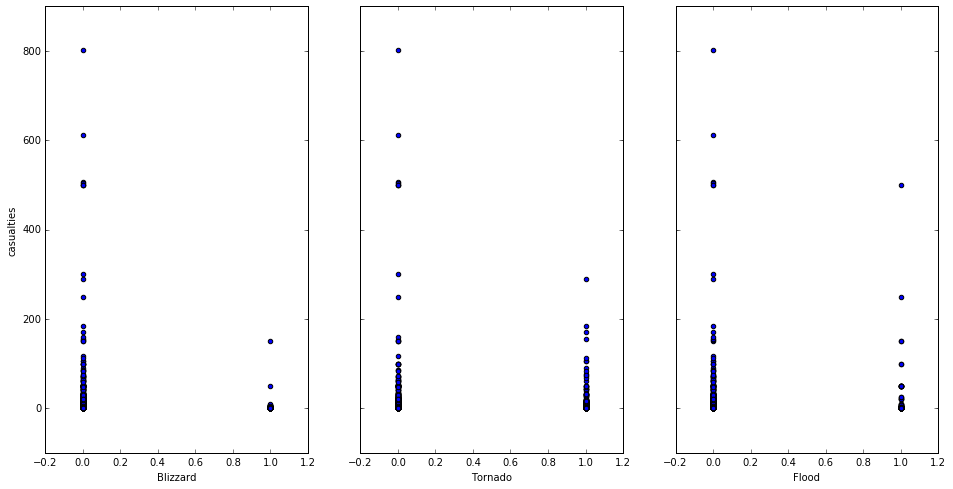

In [23]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Blizzard', y = 'casualties', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Tornado', y = 'casualties', ax=axs[1])
data.plot(kind='scatter', x='Flood', y = 'casualties', ax=axs[2])

In [15]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [92]:
logit = LogisticRegression()

In [93]:
# Perform Train Test Split ( I will do K fold cross val below)
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
logit.score(x_train, y_train)

0.97787526881720432

In [95]:
logit.score(x_test, y_test)

0.97718709677419358

In [96]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [97]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
# GridSearchCV(cv=None,
#        estimator=LogisticRegression(C=1.0, intercept_scaling=1, dual=False, fit_intercept=True,
#           penalty='l2', tol=0.0001),
#        param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [98]:
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [99]:
clf.best_score_

0.97770322580645164

In [100]:
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
predictions = logit.predict(x_test)
print predictions

NotFittedError: This LogisticRegression instance is not fitted yet

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import statsmodels.api as sm
import patsy
% matplotlib inline

from matplotlib import pyplot as plt


In [ ]:
mod = sm.OLS(y,X)    # Describe model
res = mod.fit()       # Fit model
print res.summary()   # Summarize model

In [ ]:
mod = sm.OLS(y,X)    # Describe model
print res.summary()   # Summarize model

In [ ]:
res.params.sort_values()